**Описание перменных:**

*   **tweet** - предложение (твит), которое человек написал в социальной сети X

*   **feeling** - бинарная переменная, равная 1, если твит положительного настроения, и 0, если твит негативного настроения



In [594]:
import pandas as pd

#Читаем файл, разделяем строки по табуляции и задаём имена для столбцов
df = pd.read_csv('train_150k.txt', sep='\t', header = None, names = ['feeling', 'tweet'])

### **1) Первичный анализ данных**

In [595]:
df.head()

,feeling,tweet
0,0,Starting back at work today Looks like it'l...
1,1,Sugar levels dropping... munchies setting in. ...
2,1,@karineb22 yeah!!! have a great summer break!
3,1,hannah montana was very good. now going to re...
4,1,"@Mayra326 aww, have fun! I just had my 3D las..."


In [596]:
df.shape

(149985, 2)

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149985 entries, 0 to 149984
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   feeling  149985 non-null  int64 
 1   tweet    149985 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [598]:
df.isnull().sum()

,0
feeling,0
tweet,0


In [599]:
df.duplicated().sum()

0

Набор наблюдений является обучающим (train set). Выборка содержит 149 985 наблюдений, пропущенных значений и дубликатов нет.

Переменная ***feeling*** является категориальной (номинальной, бинарной), тип данных -- int64. Она обозначает два состояния (позитивное и негативное настроение).

Переменная ***tweet*** тоже является категориальной: тип данных -- object. Данная переменная представляет собой категории (каждый твит можно -- отдельная категория).







### **2) Анализ целевой переменной feeling**

В данной главе сравнивается количество позитивных и негативных твитов. Для лучшего восприятия строятся столбчатая (bar) и круговая (pie) диаграммы.

In [600]:
import matplotlib.pyplot as plt
import numpy as np

In [601]:
#Количество позитивных и отрицательных твитов
positive_count = df[df['feeling'] == 1].shape[0]
negative_count = df[df['feeling'] == 0].shape[0]

print(f'Количество положительных твитов: {positive_count}')
print(f'Количество отрицательных твитов: {negative_count}')

Количество положительных твитов: 74966
Количество отрицательных твитов: 75019


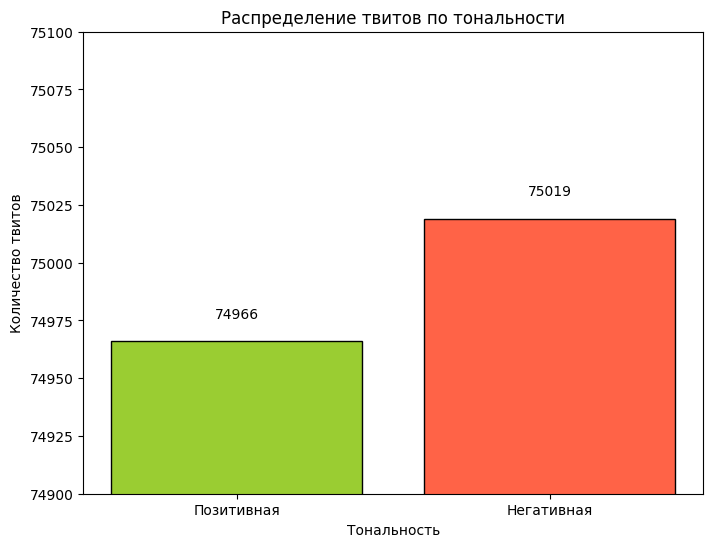

In [602]:
#Столбчатая диаграмма для отображения распределения тональности
plt.figure(figsize=(8, 6))
plt.bar(['Позитивная', 'Негативная'], [positive_count, negative_count], color=['yellowgreen', 'tomato'], edgecolor=['black'])
plt.title('Распределение твитов по тональности')
plt.xlabel('Тональность')
plt.ylabel('Количество твитов')

plt.text(0, positive_count + 10, str(positive_count), ha='center', color='black')
plt.text(1, negative_count + 10, str(negative_count), ha='center', color='black')

plt.ylim(74900, 75100)
plt.show()

In [603]:
#Круговая диаграмма для отображения распределения тональности
unique, count = np.unique(df['feeling'], return_counts=True)
print(unique, count)

[0 1] [75019 74966]


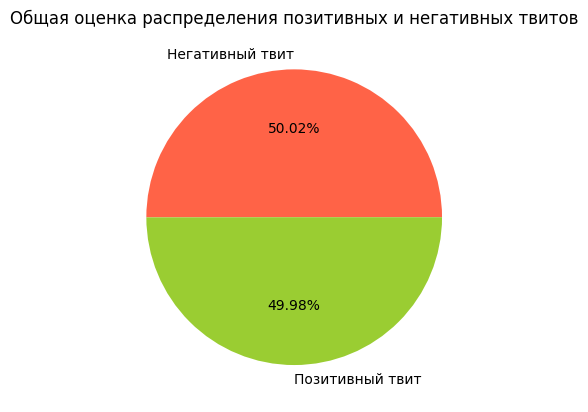

In [604]:
plt.pie(x=count,
        labels=['Негативный твит', 'Позитивный твит'],
        colors=['tomato', 'yellowgreen'],
        autopct='%.2f%%')
plt.title('Общая оценка распределения позитивных и негативных твитов')
plt.show()

Позитивные и негативные твиты встречаются практически с одинаковой периодичностью: количество твитов положительной тональности составляет 74 966 (49,98%) и отрицательной тональности - 75 019 (50,02%).

### **3) Анализ текстовых данных**

В главе 3
1.   проанализированы распределения количества слов и символов в твитах позитивной и негативной тональности;
3.   построен график, отражающий среднюю, минимальную и максимальную длину текста для каждой тональности.



Перед тем как начать исследовать датасет полноценно, очистим текст от ненужных для анализа данных. Для этого в каждом твите оставим только "небуквы": уберём все цифры, знаки препинания и любые другие символы, которые не относятся к буквам (в частности, лишние пробелы). Помимо этого выравним регистр - объединим таким образом слова, которые означают одно и то же (например, *sun* = *SUN*, *sun*, *Sun*).

**3.1. Количество символов и слов в твитах**

In [605]:
import seaborn as sns
import re

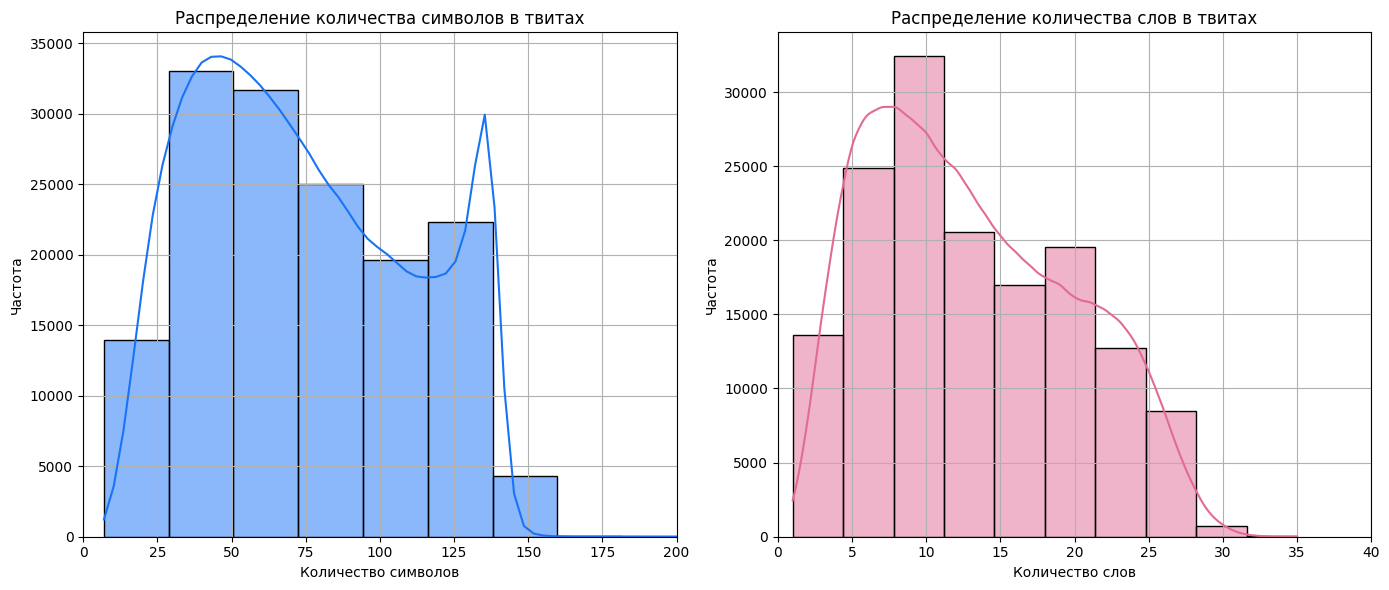

In [606]:
df['tweet'] = df['tweet'].str.replace('&quot;', '"') #Заменяем выражение &quot; на кавычку "

df['char_count'] = df['tweet'].str.len() #Количество символов в твитах

df['cleaned_tweet'] = df['tweet'].str.lower()

df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'[^a-zA-Z\s]', '', regex=True) #Удаляем знаки препинания и цифры и оставляем только буквы и пробелы

df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'\s+', ' ', regex=True).str.strip()  #Удаляем лишние пробелы

df['word_count'] = df['cleaned_tweet'].str.split().str.len() #Количество слов в твитах

#График распределения количества символов в твитах
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['char_count'], bins=30, color='#1973f6', kde=True)
plt.title('Распределение количества символов в твитах')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.xlim(0, 200)
plt.grid()

#График распределения количества слов в твитах
plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=10, color='#e16b96', kde=True)
plt.title('Распределение количества слов в твитах')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.xlim(0, 40)
plt.grid()

plt.tight_layout()
plt.show()

In [607]:
df

,feeling,tweet,char_count,cleaned_tweet,word_count
0,0,Starting back at work today Looks like it'l...,87,starting back at work today looks like itll be...,16
1,1,Sugar levels dropping... munchies setting in. ...,103,sugar levels dropping munchies setting in luck...,16
2,1,@karineb22 yeah!!! have a great summer break!,46,karineb yeah have a great summer break,7
3,1,hannah montana was very good. now going to re...,59,hannah montana was very good now going to read...,10
4,1,"@Mayra326 aww, have fun! I just had my 3D las...",53,mayra aww have fun i just had my d last week,11
...,...,...,...,...,...
149980,0,Had a great night at Tabs but now I'm missing ...,65,had a great night at tabs but now im missing c...,14
149981,1,What a night at work.. Church in the morning,45,what a night at work church in the morning,9
149982,0,this book is terrible im used 2 reading all ...,137,this book is terrible im used reading all make...,24
149983,0,@backstreetboys Updates? Any? I miss your upd...,57,backstreetboys updates any i miss your updates...,8


In [608]:
group_char = df.groupby(['feeling']).agg(
        mean_length =('char_count', 'mean'),
        min_length =('char_count', 'min'),
        max_length =('char_count','max'),
        count = ('char_count', 'count')
)

In [609]:
group_char

,mean_length,min_length,max_length,count
feeling,,,,
0,75.071355,7,417,75019
1,74.119841,7,662,74966


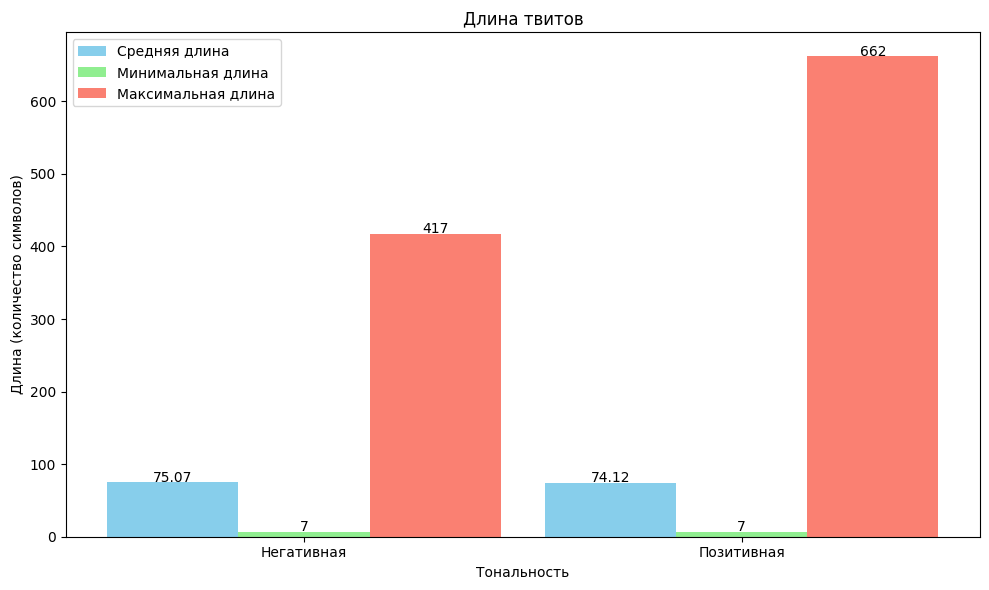

In [610]:
plt.figure(figsize=(10, 6))

x = range(len(group_char))
width = 0.3  #Ширина столбцов

plt.bar([p - width for p in x], group_char['mean_length'], width, label='Средняя длина', color='skyblue')
plt.bar(x, group_char['min_length'], width, label='Минимальная длина', color='lightgreen')
plt.bar([p + width for p in x], group_char['max_length'], width, label='Максимальная длина', color='salmon')

for i in x:
    plt.text(i - width, group_char['mean_length'].iloc[i] + 1, f"{group_char['mean_length'].iloc[i]:.2f}", ha='center', color='black')
    plt.text(i, group_char['min_length'].iloc[i] + 1, f"{group_char['min_length'].iloc[i]:}", ha='center', color='black')
    plt.text(i + width, group_char['max_length'].iloc[i] + 1, f"{group_char['max_length'].iloc[i]}", ha='center', color='black')

plt.ylabel('Длина (количество символов)')
plt.xlabel('Тональность')
plt.title('Длина твитов')
plt.xticks(x, ['Негативная', 'Позитивная'])
plt.legend()
plt.tight_layout()
plt.show()

На данном этапе датасет выглядит следующим обазом:

In [611]:
df.head()

,feeling,tweet,char_count,cleaned_tweet,word_count
0,0,Starting back at work today Looks like it'l...,87,starting back at work today looks like itll be...,16
1,1,Sugar levels dropping... munchies setting in. ...,103,sugar levels dropping munchies setting in luck...,16
2,1,@karineb22 yeah!!! have a great summer break!,46,karineb yeah have a great summer break,7
3,1,hannah montana was very good. now going to re...,59,hannah montana was very good now going to read...,10
4,1,"@Mayra326 aww, have fun! I just had my 3D las...",53,mayra aww have fun i just had my d last week,11


В целом количество слов в твитах находится в пределах 40 слов (200 символов).
Чаще всего каждый твит состоит из 8-12 слов (30-75 символов).
**Примечание.** Количество символов посчтано до обработки текста.

Минимальное количество символов в твитах составляет 7 для обоих типов тональности. При этом среднее число символов в твитах позитивной тональности  равно 74,12, в твитах негативной тональности - 75,07. Как мы видим, среднее и минимально число символов практически не отличается в зависимости от настроения твита.

При этом максимальное число символов в твитах позитивной тональности приблизительно в 1,5 раза превышает эту величину в твитах негативной тональности -- 662 против 417 соответственно.

### **4) Обработка текста**

В главе 4
1.  проводится токенизация текста по словам -- каждый твит рабивается на токены (слова);
2.  удаляются стоп-слова - слова, который не несут большой смысловой нагрузки, но зашумляют данные. К таким словам относятся союзы, междометия, артикли и др.;
3.  рассматривается количество слов различных частей речи в твитах. Для наглядности строится горизонтальная столбчатая диаграмма (bar);
4.  проводится лемматизация -- приведение каждого слова к канонической форме (лемме);
5. анализируются облака слов и топ-20 слов твитов позитивной и негативной тональностей;
6. строятся би- и триграммы для твитов обоих типов тональности.


In [612]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

**4.1. Токенизация**

In [613]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [614]:
df['tokens'] = df['cleaned_tweet'].apply(word_tokenize)

In [615]:
df['tokens']

,tokens
0,"[starting, back, at, work, today, looks, like,..."
1,"[sugar, levels, dropping, munchies, setting, i..."
2,"[karineb, yeah, have, a, great, summer, break]"
3,"[hannah, montana, was, very, good, now, going,..."
4,"[mayra, aww, have, fun, i, just, had, my, d, l..."
...,...
149980,"[had, a, great, night, at, tabs, but, now, im,..."
149981,"[what, a, night, at, work, church, in, the, mo..."
149982,"[this, book, is, terrible, im, used, reading, ..."
149983,"[backstreetboys, updates, any, i, miss, your, ..."


**4.2. Удаление стоп-слов**

In [616]:
def delete_stopwords(tokens):
    cleaned = []
    for word in tokens:
        if word not in stop_words:
            cleaned.append(word)
    return cleaned

df['cleaned_tokens'] = df['tokens'].apply(delete_stopwords)

In [617]:
df['cleaned_tokens']

,cleaned_tokens
0,"[starting, back, work, today, looks, like, itl..."
1,"[sugar, levels, dropping, munchies, setting, l..."
2,"[karineb, yeah, great, summer, break]"
3,"[hannah, montana, good, going, read, twilight]"
4,"[mayra, aww, fun, last, week]"
...,...
149980,"[great, night, tabs, im, missing, chad, going,..."
149981,"[night, work, church, morning]"
149982,"[book, terrible, im, used, reading, make, beli..."
149983,"[backstreetboys, updates, miss, updates, guys]"


**4.3. Лемматизация**

In [618]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [619]:
def lemmatize_tokens(tokens):
    lemmatized = []
    for word in tokens:
        lemmatized.append(lemmatizer.lemmatize(word))
    return lemmatized

df['lemmatized'] = df['cleaned_tokens'].apply(lemmatize_tokens)

In [620]:
df

,feeling,tweet,char_count,cleaned_tweet,word_count,tokens,cleaned_tokens,lemmatized
0,0,Starting back at work today Looks like it'l...,87,starting back at work today looks like itll be...,16,"[starting, back, at, work, today, looks, like,...","[starting, back, work, today, looks, like, itl...","[starting, back, work, today, look, like, itll..."
1,1,Sugar levels dropping... munchies setting in. ...,103,sugar levels dropping munchies setting in luck...,16,"[sugar, levels, dropping, munchies, setting, i...","[sugar, levels, dropping, munchies, setting, l...","[sugar, level, dropping, munchies, setting, lu..."
2,1,@karineb22 yeah!!! have a great summer break!,46,karineb yeah have a great summer break,7,"[karineb, yeah, have, a, great, summer, break]","[karineb, yeah, great, summer, break]","[karineb, yeah, great, summer, break]"
3,1,hannah montana was very good. now going to re...,59,hannah montana was very good now going to read...,10,"[hannah, montana, was, very, good, now, going,...","[hannah, montana, good, going, read, twilight]","[hannah, montana, good, going, read, twilight]"
4,1,"@Mayra326 aww, have fun! I just had my 3D las...",53,mayra aww have fun i just had my d last week,11,"[mayra, aww, have, fun, i, just, had, my, d, l...","[mayra, aww, fun, last, week]","[mayra, aww, fun, last, week]"
...,...,...,...,...,...,...,...,...
149980,0,Had a great night at Tabs but now I'm missing ...,65,had a great night at tabs but now im missing c...,14,"[had, a, great, night, at, tabs, but, now, im,...","[great, night, tabs, im, missing, chad, going,...","[great, night, tab, im, missing, chad, going, ..."
149981,1,What a night at work.. Church in the morning,45,what a night at work church in the morning,9,"[what, a, night, at, work, church, in, the, mo...","[night, work, church, morning]","[night, work, church, morning]"
149982,0,this book is terrible im used 2 reading all ...,137,this book is terrible im used reading all make...,24,"[this, book, is, terrible, im, used, reading, ...","[book, terrible, im, used, reading, make, beli...","[book, terrible, im, used, reading, make, beli..."
149983,0,@backstreetboys Updates? Any? I miss your upd...,57,backstreetboys updates any i miss your updates...,8,"[backstreetboys, updates, any, i, miss, your, ...","[backstreetboys, updates, miss, updates, guys]","[backstreetboys, update, miss, update, guy]"


**4.4. Распределение частей речи**

In [621]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [622]:
df['pos_tags'] = df['lemmatized'].apply(pos_tag)

In [623]:
df['pos_tags']

,pos_tags
0,"[(starting, VBG), (back, RP), (work, NN), (tod..."
1,"[(sugar, NN), (level, NN), (dropping, VBG), (m..."
2,"[(karineb, NN), (yeah, NN), (great, JJ), (summ..."
3,"[(hannah, NN), (montana, NN), (good, JJ), (goi..."
4,"[(mayra, NN), (aww, NN), (fun, NN), (last, JJ)..."
...,...
149980,"[(great, JJ), (night, NN), (tab, NN), (im, NN)..."
149981,"[(night, NN), (work, NN), (church, NN), (morni..."
149982,"[(book, NN), (terrible, JJ), (im, NN), (used, ..."
149983,"[(backstreetboys, NNS), (update, JJ), (miss, J..."


In [624]:
df

,feeling,tweet,char_count,cleaned_tweet,word_count,tokens,cleaned_tokens,lemmatized,pos_tags
0,0,Starting back at work today Looks like it'l...,87,starting back at work today looks like itll be...,16,"[starting, back, at, work, today, looks, like,...","[starting, back, work, today, looks, like, itl...","[starting, back, work, today, look, like, itll...","[(starting, VBG), (back, RP), (work, NN), (tod..."
1,1,Sugar levels dropping... munchies setting in. ...,103,sugar levels dropping munchies setting in luck...,16,"[sugar, levels, dropping, munchies, setting, i...","[sugar, levels, dropping, munchies, setting, l...","[sugar, level, dropping, munchies, setting, lu...","[(sugar, NN), (level, NN), (dropping, VBG), (m..."
2,1,@karineb22 yeah!!! have a great summer break!,46,karineb yeah have a great summer break,7,"[karineb, yeah, have, a, great, summer, break]","[karineb, yeah, great, summer, break]","[karineb, yeah, great, summer, break]","[(karineb, NN), (yeah, NN), (great, JJ), (summ..."
3,1,hannah montana was very good. now going to re...,59,hannah montana was very good now going to read...,10,"[hannah, montana, was, very, good, now, going,...","[hannah, montana, good, going, read, twilight]","[hannah, montana, good, going, read, twilight]","[(hannah, NN), (montana, NN), (good, JJ), (goi..."
4,1,"@Mayra326 aww, have fun! I just had my 3D las...",53,mayra aww have fun i just had my d last week,11,"[mayra, aww, have, fun, i, just, had, my, d, l...","[mayra, aww, fun, last, week]","[mayra, aww, fun, last, week]","[(mayra, NN), (aww, NN), (fun, NN), (last, JJ)..."
...,...,...,...,...,...,...,...,...,...
149980,0,Had a great night at Tabs but now I'm missing ...,65,had a great night at tabs but now im missing c...,14,"[had, a, great, night, at, tabs, but, now, im,...","[great, night, tabs, im, missing, chad, going,...","[great, night, tab, im, missing, chad, going, ...","[(great, JJ), (night, NN), (tab, NN), (im, NN)..."
149981,1,What a night at work.. Church in the morning,45,what a night at work church in the morning,9,"[what, a, night, at, work, church, in, the, mo...","[night, work, church, morning]","[night, work, church, morning]","[(night, NN), (work, NN), (church, NN), (morni..."
149982,0,this book is terrible im used 2 reading all ...,137,this book is terrible im used reading all make...,24,"[this, book, is, terrible, im, used, reading, ...","[book, terrible, im, used, reading, make, beli...","[book, terrible, im, used, reading, make, beli...","[(book, NN), (terrible, JJ), (im, NN), (used, ..."
149983,0,@backstreetboys Updates? Any? I miss your upd...,57,backstreetboys updates any i miss your updates...,8,"[backstreetboys, updates, any, i, miss, your, ...","[backstreetboys, updates, miss, updates, guys]","[backstreetboys, update, miss, update, guy]","[(backstreetboys, NNS), (update, JJ), (miss, J..."


In [625]:
from collections import Counter

In [626]:
pos_counts = Counter()
for tags in df['pos_tags']:
    pos_counts.update(tag for word, tag in tags)

In [627]:
df_pos = pd.DataFrame(pos_counts.items(), columns=['Part of Speech', 'Count'])

In [628]:
df_pos

,Part of Speech,Count
0,VBG,54716
1,RP,1131
2,NN,557837
3,VBP,50568
4,IN,20901
5,JJ,204476
6,NNS,39691
7,RB,78615
8,VBD,46093
9,PRP,1630


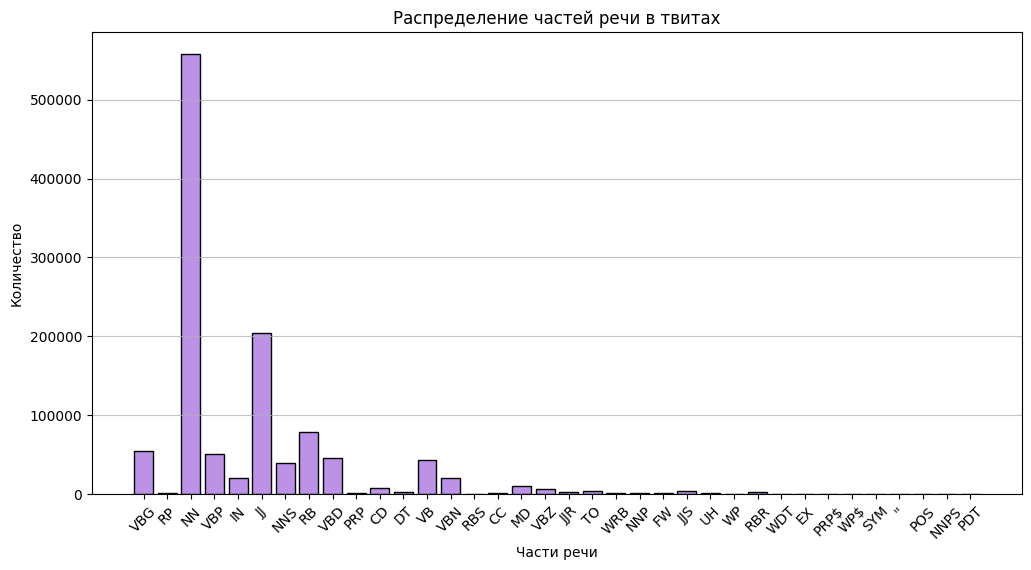

In [629]:
plt.figure(figsize=(12, 6))
plt.bar(df_pos['Part of Speech'], df_pos['Count'], color='#bb92e6', edgecolor='black')
plt.title('Распределение частей речи в твитах')
plt.xlabel('Части речи')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

**4.5. Облака слов для каждой тональности**

In [630]:
from wordcloud import WordCloud

In [631]:
df['lemmatized_str'] = df['lemmatized'].apply(lambda x: ' '.join(x))

In [632]:
df['lemmatized_str']

,lemmatized_str
0,starting back work today look like itll rainin...
1,sugar level dropping munchies setting luckily ...
2,karineb yeah great summer break
3,hannah montana good going read twilight
4,mayra aww fun last week
...,...
149980,great night tab im missing chad going bed
149981,night work church morning
149982,book terrible im used reading make belief teen...
149983,backstreetboys update miss update guy


In [633]:
positive_tweets = ' '.join(df[df['feeling'] == 1]['lemmatized_str'])
negative_tweets = ' '.join(df[df['feeling'] == 0]['lemmatized_str'])

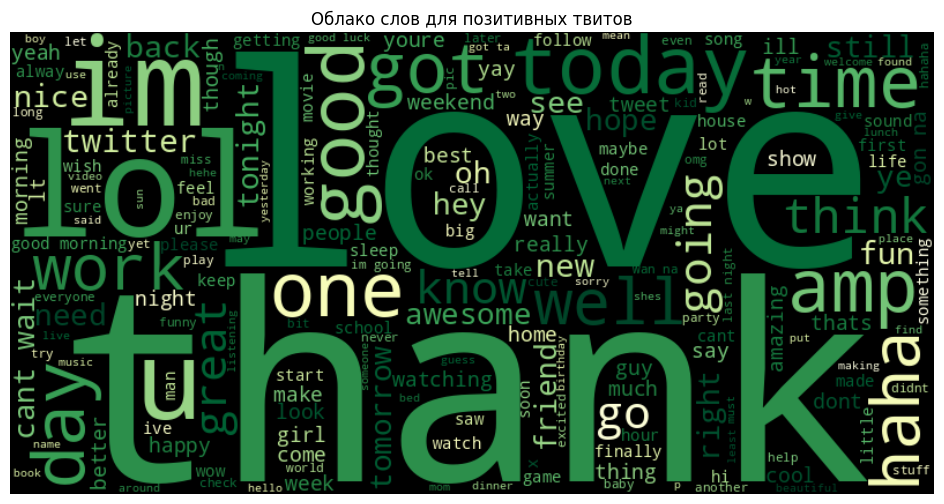

In [634]:
wordcloud_pos = WordCloud(width=800, height=400, colormap='YlGn', background_color='black').generate(positive_tweets)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для позитивных твитов')
plt.show()

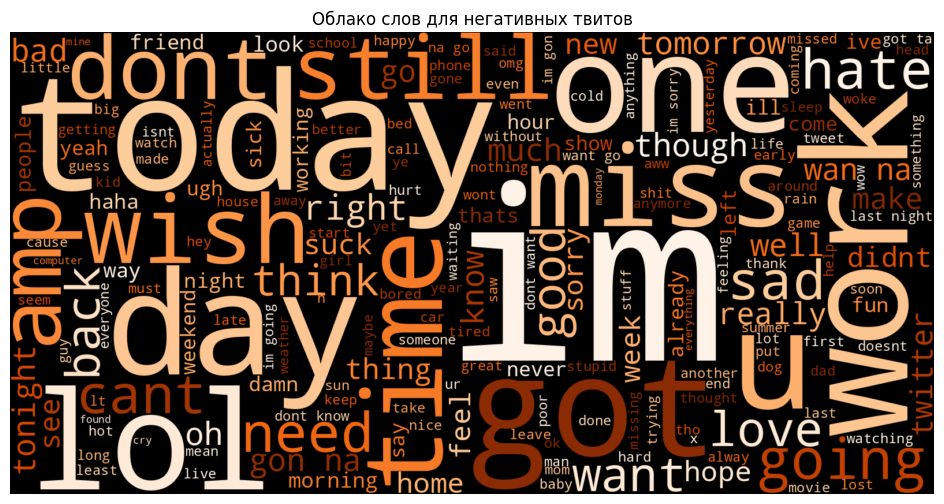

In [635]:
wordcloud_neg = WordCloud(width=1600, height=800, colormap='Oranges_r', background_color='black').generate(negative_tweets)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для негативных твитов')
plt.show()

**4.6. Топ-20 самых частых слов для каждой тональности**

In [636]:
dict_pos = {} #Словарь: 'слова': кол-во (позитив)
for tweet in df[df['feeling'] == 1]['lemmatized_str']:
    words_pos = tweet.split()
    for word in words_pos:
        if word in dict_pos:
            dict_pos[word] += 1
        else:
            dict_pos[word] = 1

In [637]:
dict_neg = {} #Словарь: 'слова': кол-во (негатив)
for tweet in df[df['feeling'] == 0]['lemmatized_str']:
    words_neg = tweet.split()
    for word in words_neg:
        if word in dict_neg:
            dict_neg[word] += 1
        else:
            dict_neg[word] = 1

In [638]:
df_dict_pos = pd.DataFrame(list(dict_pos.items()), columns=['word', 'frequency']).nlargest(20, 'frequency')
df_dict_neg = pd.DataFrame(list(dict_neg.items()), columns=['word', 'frequency']).nlargest(20, 'frequency')

In [639]:
df_dict_pos

,word,frequency
41,im,7200
17,good,5700
53,day,5094
286,love,4655
284,get,3583
221,like,3570
98,u,3564
149,thanks,3300
77,lol,3216
82,time,3147


In [640]:
df_dict_neg

,word,frequency
36,im,9760
10,day,4862
104,go,4545
29,get,4440
189,cant,4207
143,dont,4186
2,work,4133
5,like,3844
54,got,3549
3,today,3517


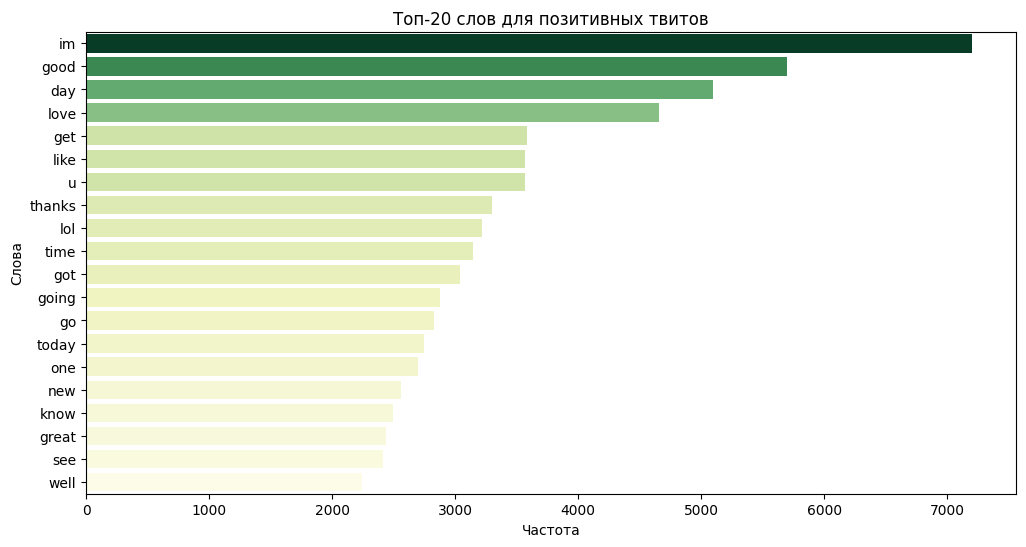

In [641]:
#Топ-20 слов в позитивных твитах
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', hue='frequency', data=df_dict_pos, palette='YlGn', legend=False)
plt.title('Топ-20 слов для позитивных твитов')
plt.xlabel('Частота')
plt.ylabel('Cлова')
plt.show()

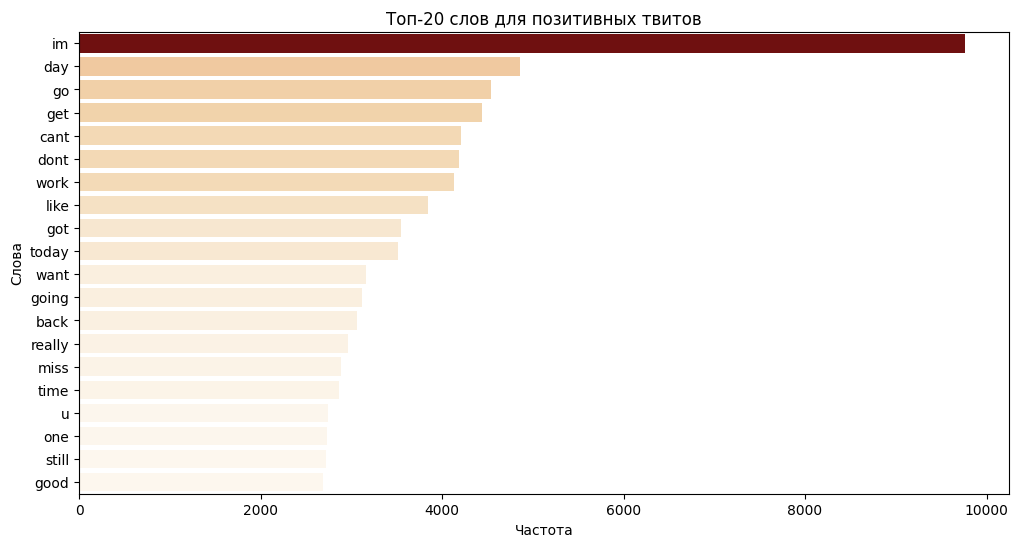

In [642]:
#Топ-20 слов в негативных твитах
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', hue='frequency', data=df_dict_neg, palette='OrRd', legend=False)
plt.title('Топ-20 слов для позитивных твитов')
plt.xlabel('Частота')
plt.ylabel('Cлова')
plt.show()

Наиболее используемая часть речи -- существительное в единственном числе (NN). Оно встречается около 557 837 раз во всех твитах. На втором месте по частоте использования расположены прилагательные (JJ), на третьем -- наречие (RB). Они встречаются 204 476 и 78 615 раз соответственно.

Самыми популярными словами в позитивных твитах стали im, good, day, love и get, в негативных -- im, day, go, get и cant.

### **5) Анализ n-грамм**

В главе 5 исследуются би- и триграммы для твитов позитивной и негативной тональностей.

**5.1. Биграммы для позитивных твитов**

In [643]:
bigrams_pos = []
for tweet in df[df['feeling'] == 1]['lemmatized_str']:
    words = tweet.split()
    for bigram in ngrams(words, 2):
        bigrams_pos.append(' '.join(bigram)) #Биграмма ---> Строка

In [644]:
#Подсчёт частоты биграмм
dict_bigram_pos = {}
for bigram in bigrams_pos:
    if bigram in dict_bigram_pos:
        dict_bigram_pos[bigram] += 1
    else:
        dict_bigram_pos[bigram] = 1

In [645]:
df_bigram_pos = pd.DataFrame(list(dict_bigram_pos.items()), columns=['bigram', 'frequency']).nlargest(20, 'frequency')

In [646]:
df_bigram_pos

,bigram,frequency
601,cant wait,1004
1821,gon na,980
226,good morning,664
114,im going,456
2489,last night,452
153,wan na,425
1781,good luck,396
2336,got ta,338
1281,good night,325
2722,looking forward,313


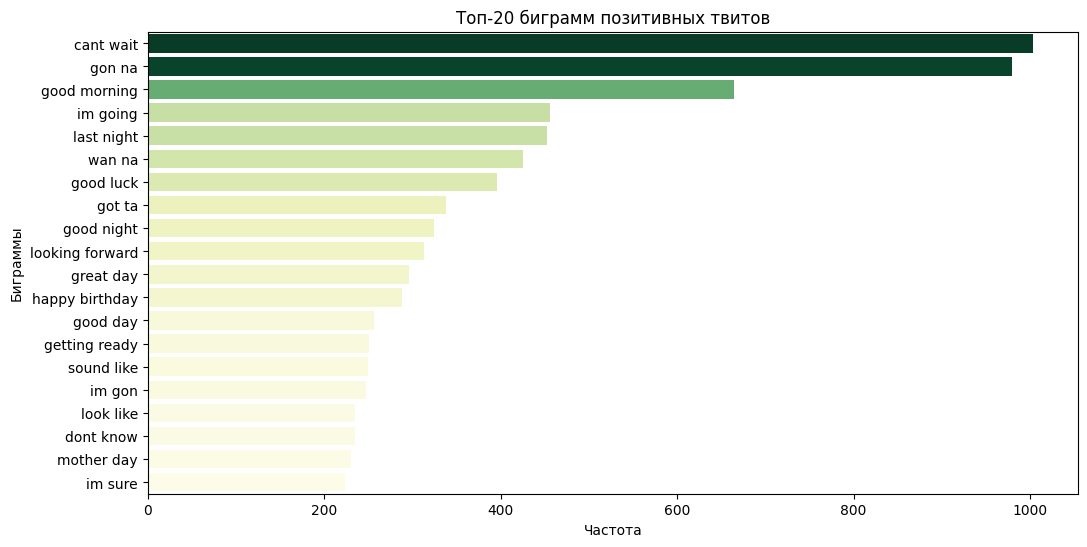

In [647]:
#Топ-20 биграмм в позитивных твитах
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='bigram', hue='frequency', data=df_bigram_pos, palette='YlGn', legend=False)
plt.title('Топ-20 биграмм позитивных твитов')
plt.xlabel('Частота')
plt.ylabel('Биграммы')
plt.show()

**5.2. Триграммы для позитивных твиттов**

In [648]:
#Подсчёт триграмм для позитивных твитов
trigrams_pos = []
for tweet in df[df['feeling'] == 1]['lemmatized_str']:
    words = tweet.split()
    for trigram in ngrams(words, 3):
        trigrams_pos.append(' '.join(trigram))

In [649]:
dict_trigram_pos = {}
for trigram in trigrams_pos:
    if trigram in dict_trigram_pos:
        dict_trigram_pos[trigram] += 1
    else:
        dict_trigram_pos[trigram] = 1

In [650]:
df_trigram_pos = pd.DataFrame(list(dict_trigram_pos.items()), columns=['trigram', 'frequency']).nlargest(20, 'frequency')

In [651]:
df_trigram_pos

,trigram,frequency
1587,im gon na,245
1085,cant wait see,202
9417,happy mother day,152
7602,get follower day,128
7603,follower day using,128
7607,add everyone train,128
7608,everyone train pay,128
7609,train pay vip,128
5062,gon na go,102
3582,mtv movie award,86


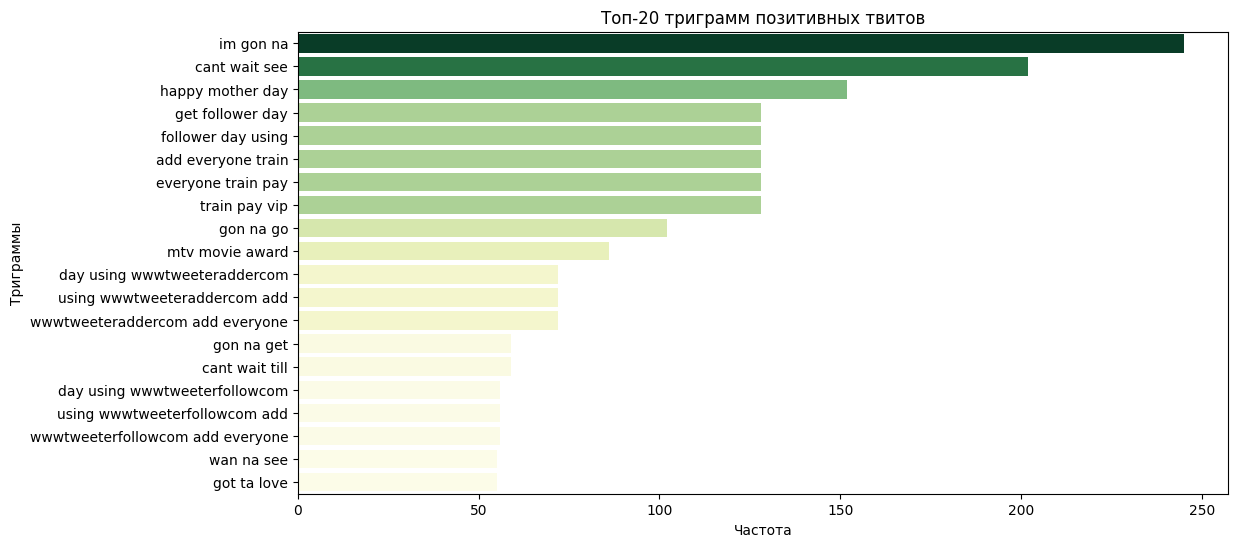

In [652]:
#Топ-20 триграмм в позитивных твитах
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='trigram', hue='frequency', data=df_trigram_pos, palette='YlGn', legend=False)
plt.title('Топ-20 триграмм позитивных твитов')
plt.xlabel('Частота')
plt.ylabel('Триграммы')
plt.show()

**5.3. Биграммы для негативных твитов**

In [653]:
bigrams_neg = []
for tweet in df[df['feeling'] == 0]['lemmatized_str']:
    words = tweet.split()
    for bigram in ngrams(words, 2):
        bigrams_neg.append(' '.join(bigram)) #Биграмма ---> Строка

In [654]:
#Подсчёт частоты биграмм
dict_bigram_neg = {}
for bigram in bigrams_neg:
    if bigram in dict_bigram_neg:
        dict_bigram_neg[bigram] += 1
    else:
        dict_bigram_neg[bigram] = 1

In [655]:
df_bigram_neg = pd.DataFrame(list(dict_bigram_neg.items()), columns=['bigram', 'frequency']).nlargest(20, 'frequency')

In [656]:
df_bigram_neg

,bigram,frequency
135,gon na,1207
852,wan na,1071
504,last night,690
1049,feel like,614
215,im sorry,558
1392,wish could,547
148,dont know,540
72,im going,499
5550,dont want,462
53,got ta,455


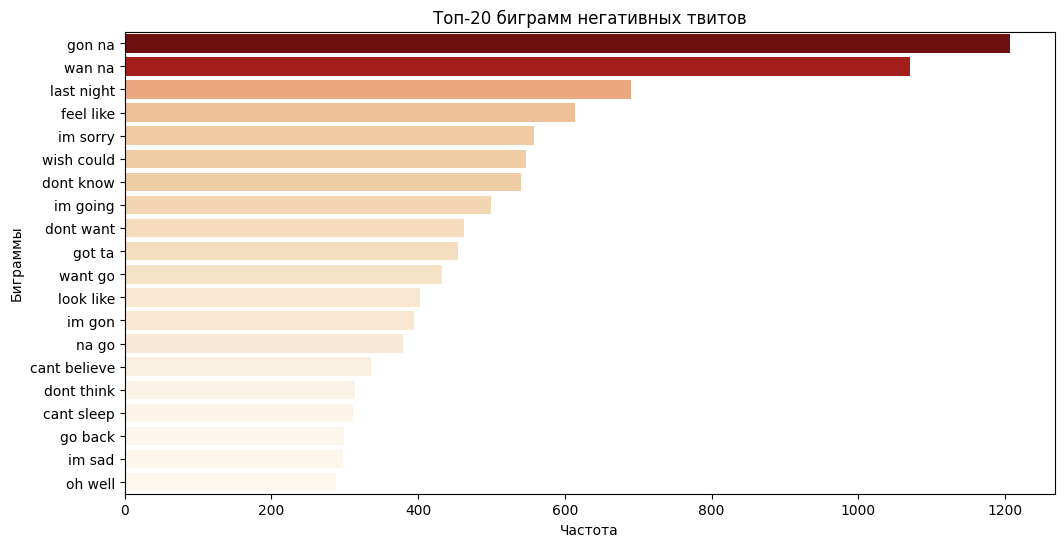

In [657]:
#Топ-20 биграмм в негативных твитах
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='bigram', hue='frequency', data=df_bigram_neg, palette='OrRd', legend=False)
plt.title('Топ-20 биграмм негативных твитов')
plt.xlabel('Частота')
plt.ylabel('Биграммы')
plt.show()

**5.4. Триграммы для негативных твитов**

In [658]:
trigrams_neg = []
for tweet in df[df['feeling'] == 0]['lemmatized_str']:
    words = tweet.split()
    for trigram in ngrams(words, 3):
        trigrams_neg.append(' '.join(trigram))

In [659]:
dict_trigram_neg = {}
for trigram in trigrams_neg:
    if trigram in dict_trigram_neg:
        dict_trigram_neg[trigram] += 1
    else:
        dict_trigram_neg[trigram] = 1

In [660]:
df_trigram_neg = pd.DataFrame(list(dict_trigram_neg.items()), columns=['trigram', 'frequency']).nlargest(20, 'frequency')

In [661]:
df_trigram_neg

,trigram,frequency
894,im gon na,389
732,wan na go,297
2976,dont wan na,235
3583,gon na miss,150
5009,dont want go,90
1526,wish could go,84
12202,gon na go,82
5694,wan na see,80
3629,hope feel better,79
13471,dont feel good,72


Самые популярные биграммы в **позитивных твитах** -- *cant wait*, *gon na*, *good morning*, *im going* и *last night*. К наиболее частым позитивным триграммам относятся *im gon na*, *cant wait see*, *happy mother day*, *get follower day* и *follower day using*.

В **негативных твитах** распределение би- и триграмм несколько отличается от твитов положительной тональности:
1.  самые частые биграммы -- *gon na*, *wan na*, *last night*, *feel like* и *im sorry*;
2.  самые частые триграммы -- *im gon na*, *wan na go*, *dont wan na*, *gon na miss* и *dont want go*.

**Совпадающие биграммы** (но частота в зависимости от тональности различается): gon na и last night.

**Совпадающие триграммы** (частота в зависимости от тональности не меняется): im gon na.

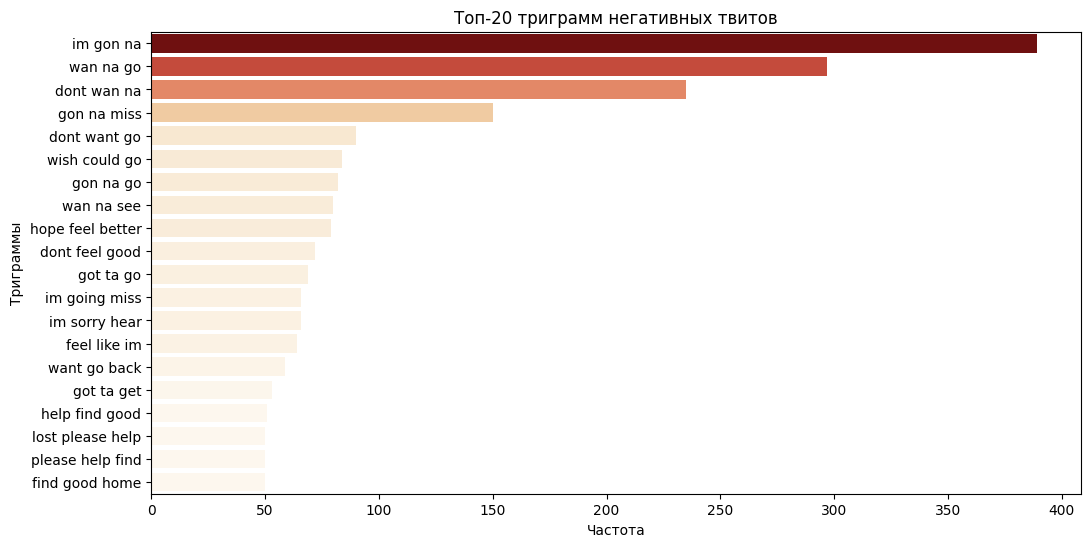

In [662]:
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='trigram', hue='frequency', data=df_trigram_neg, palette='OrRd', legend=False)
plt.title('Топ-20 триграмм негативных твитов')
plt.xlabel('Частота')
plt.ylabel('Триграммы')
plt.show()

### **6) Анализ пунктуации: восклицательный и вопросительный знаки**

В главе 6 исследуется частота использования восклицательного и вопросительного знаков в твитах положительной и отрицательной тональностей.

In [663]:
df

,feeling,tweet,char_count,cleaned_tweet,word_count,tokens,cleaned_tokens,lemmatized,pos_tags,lemmatized_str
0,0,Starting back at work today Looks like it'l...,87,starting back at work today looks like itll be...,16,"[starting, back, at, work, today, looks, like,...","[starting, back, work, today, looks, like, itl...","[starting, back, work, today, look, like, itll...","[(starting, VBG), (back, RP), (work, NN), (tod...",starting back work today look like itll rainin...
1,1,Sugar levels dropping... munchies setting in. ...,103,sugar levels dropping munchies setting in luck...,16,"[sugar, levels, dropping, munchies, setting, i...","[sugar, levels, dropping, munchies, setting, l...","[sugar, level, dropping, munchies, setting, lu...","[(sugar, NN), (level, NN), (dropping, VBG), (m...",sugar level dropping munchies setting luckily ...
2,1,@karineb22 yeah!!! have a great summer break!,46,karineb yeah have a great summer break,7,"[karineb, yeah, have, a, great, summer, break]","[karineb, yeah, great, summer, break]","[karineb, yeah, great, summer, break]","[(karineb, NN), (yeah, NN), (great, JJ), (summ...",karineb yeah great summer break
3,1,hannah montana was very good. now going to re...,59,hannah montana was very good now going to read...,10,"[hannah, montana, was, very, good, now, going,...","[hannah, montana, good, going, read, twilight]","[hannah, montana, good, going, read, twilight]","[(hannah, NN), (montana, NN), (good, JJ), (goi...",hannah montana good going read twilight
4,1,"@Mayra326 aww, have fun! I just had my 3D las...",53,mayra aww have fun i just had my d last week,11,"[mayra, aww, have, fun, i, just, had, my, d, l...","[mayra, aww, fun, last, week]","[mayra, aww, fun, last, week]","[(mayra, NN), (aww, NN), (fun, NN), (last, JJ)...",mayra aww fun last week
...,...,...,...,...,...,...,...,...,...,...
149980,0,Had a great night at Tabs but now I'm missing ...,65,had a great night at tabs but now im missing c...,14,"[had, a, great, night, at, tabs, but, now, im,...","[great, night, tabs, im, missing, chad, going,...","[great, night, tab, im, missing, chad, going, ...","[(great, JJ), (night, NN), (tab, NN), (im, NN)...",great night tab im missing chad going bed
149981,1,What a night at work.. Church in the morning,45,what a night at work church in the morning,9,"[what, a, night, at, work, church, in, the, mo...","[night, work, church, morning]","[night, work, church, morning]","[(night, NN), (work, NN), (church, NN), (morni...",night work church morning
149982,0,this book is terrible im used 2 reading all ...,137,this book is terrible im used reading all make...,24,"[this, book, is, terrible, im, used, reading, ...","[book, terrible, im, used, reading, make, beli...","[book, terrible, im, used, reading, make, beli...","[(book, NN), (terrible, JJ), (im, NN), (used, ...",book terrible im used reading make belief teen...
149983,0,@backstreetboys Updates? Any? I miss your upd...,57,backstreetboys updates any i miss your updates...,8,"[backstreetboys, updates, any, i, miss, your, ...","[backstreetboys, updates, miss, updates, guys]","[backstreetboys, update, miss, update, guy]","[(backstreetboys, NNS), (update, JJ), (miss, J...",backstreetboys update miss update guy


In [664]:
df['exclamation_count'] = df['tweet'].str.count('!')

In [665]:
df['question_count'] = df['tweet'].str.count(r'\?')

In [666]:
#Количество восклицательных и вопросительных знаков для каждой тональности
summary = df.groupby('feeling').agg({
    'exclamation_count': 'sum',
    'question_count': 'sum'
}).reset_index()

In [667]:
summary

,feeling,exclamation_count,question_count
0,0,36342,11050
1,1,50496,12027


In [668]:
summary['feeling'] = summary['feeling'].map({1: 'Позитивная', 0: 'Негативная'})

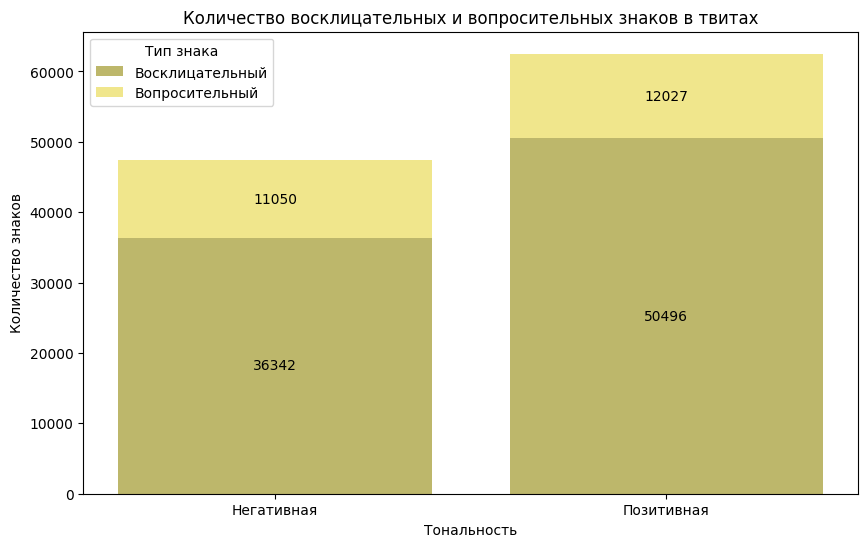

In [669]:
plt.figure(figsize=(10, 6))

plt.bar(summary['feeling'], summary['exclamation_count'],
        label='Восклицательный', color='darkkhaki')

plt.bar(summary['feeling'], summary['question_count'],
        label='Вопросительный', bottom=summary['exclamation_count'],
        color='khaki')

for i, count in enumerate(summary['exclamation_count']):
    plt.text(i, count / 2, str(count), ha='center', va='center', color='black')

for i, count in enumerate(summary['question_count']):
    plt.text(i, summary['exclamation_count'].iloc[i] + count / 2, str(count), ha='center', va='center', color='black')

plt.title('Количество восклицательных и вопросительных знаков в твитах')
plt.ylabel('Количество знаков')
plt.xlabel('Тональность')
plt.legend(title='Тип знака')
plt.show()

Заметим: в позитивных твитах восклицательный и воспросительный знаки используются чаще, чем в негативных твитах (в 1,39 и 1,09 раза соответствнно). Следовательно, в твитах положительной тональности люди более склонны к эмоциональности (с точки зрения использования количества двух указанных знаков препинания).